In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.3
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 2.7.15 |Anaconda, Inc.| (default, Dec 14 2018, 13:10:39) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
np.random.seed(1337)
#show plot inline
%matplotlib inline

In [4]:
print(os.listdir("./data/iris-species/"))

['database.sqlite', 'Iris.csv']


In [8]:
# import Dataset to play with it
dataset = pd.read_csv('./data/iris-species/Iris.csv')
iris_Species = pd.read_csv('./data/iris-species/Iris.csv')
type(dataset)
type(iris_Species)

pandas.core.frame.DataFrame

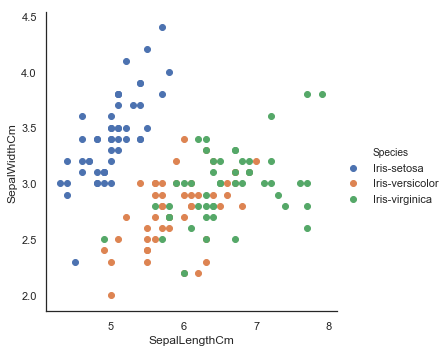

In [9]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(dataset, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

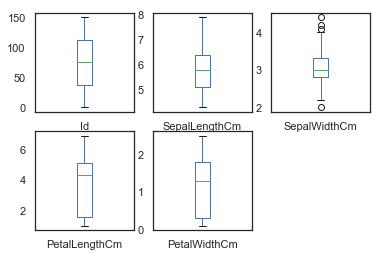

<Figure size 432x288 with 0 Axes>

In [10]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

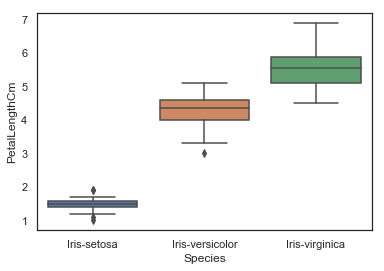

In [11]:
# To plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=dataset )
plt.show()

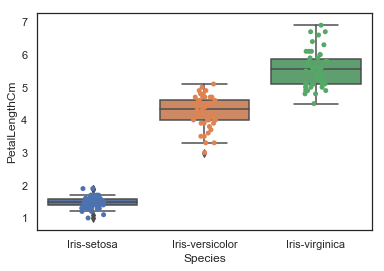

In [12]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")
plt.show()

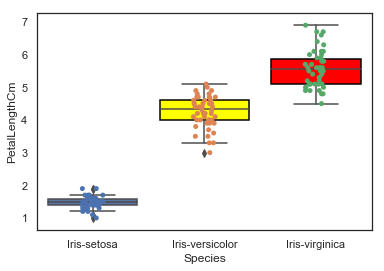

In [13]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

<Figure size 432x288 with 0 Axes>

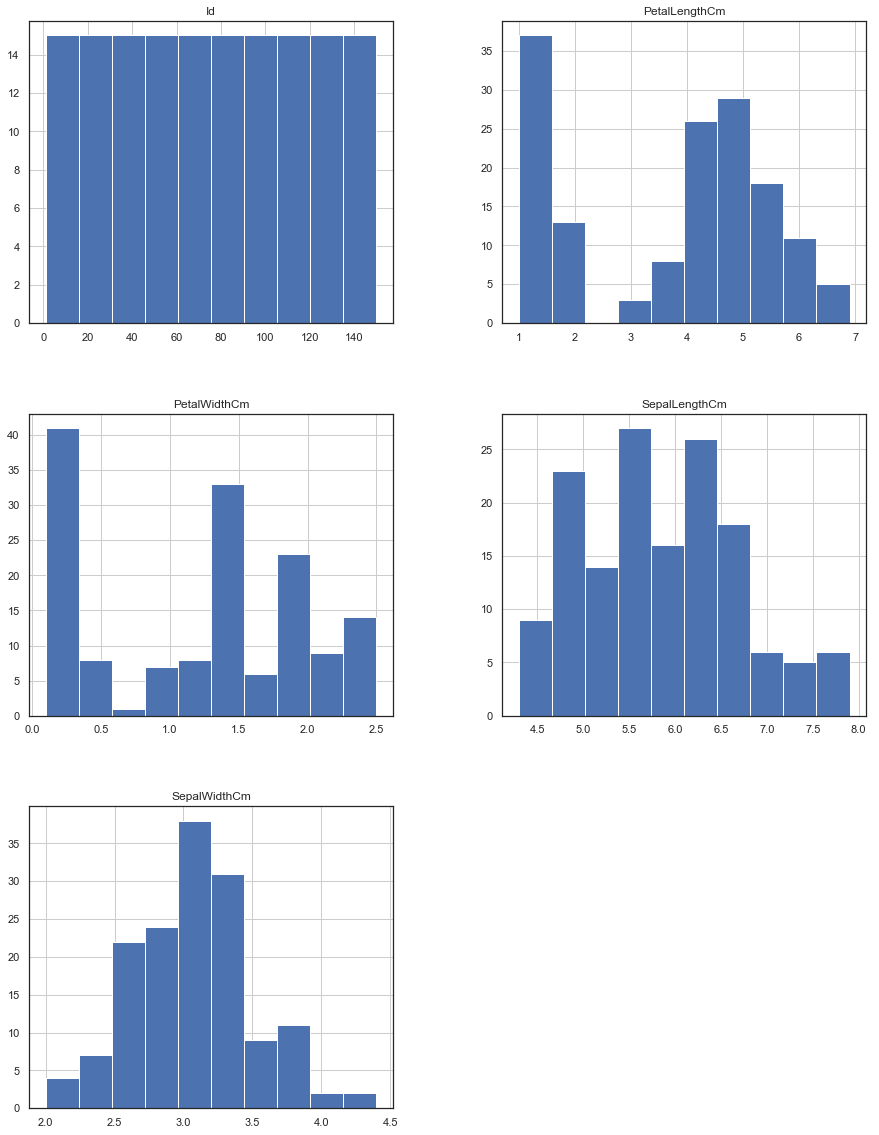

<Figure size 432x288 with 0 Axes>

In [14]:
# histograms
dataset.hist(figsize=(15,20))
plt.figure()

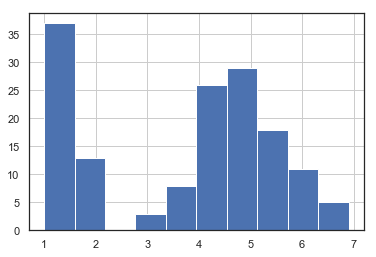

In [15]:
dataset["PetalLengthCm"].hist();

<Figure size 432x288 with 0 Axes>

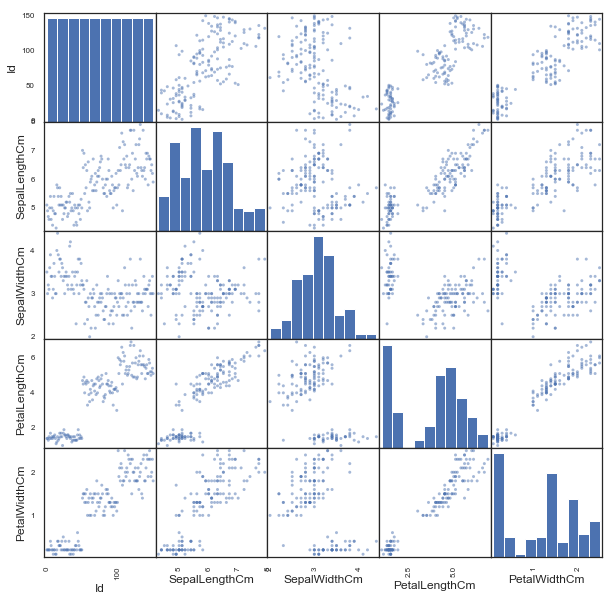

<Figure size 432x288 with 0 Axes>

In [16]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset,figsize=(10,10))
plt.figure()

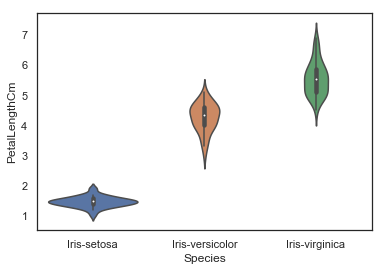

In [17]:
# violinplots on petal-length for each species
sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")

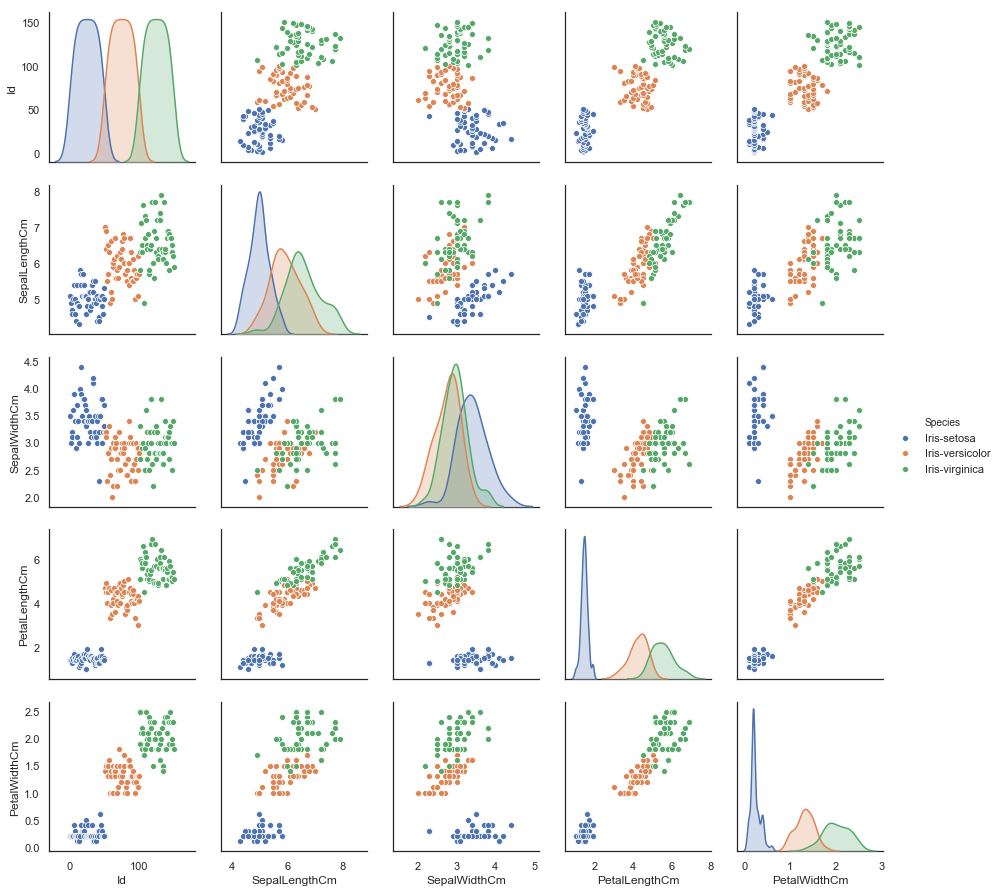

In [18]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")

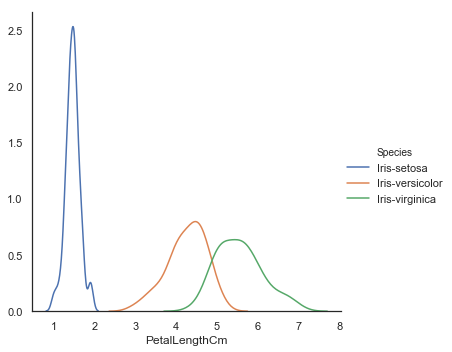

In [19]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(dataset, hue="Species", size=5).map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()

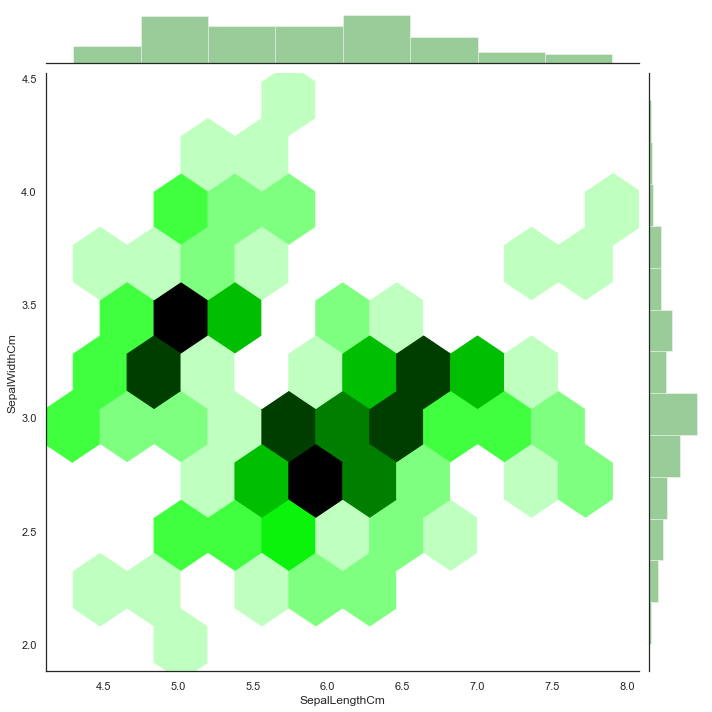

In [20]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=10,ratio=10, kind='hex',color='green')
plt.show()

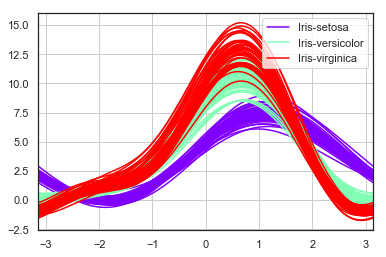

In [21]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

from pandas.tools.plotting import andrews_curves
andrews_curves(dataset.drop("Id", axis=1), "Species",colormap='rainbow')
plt.show()

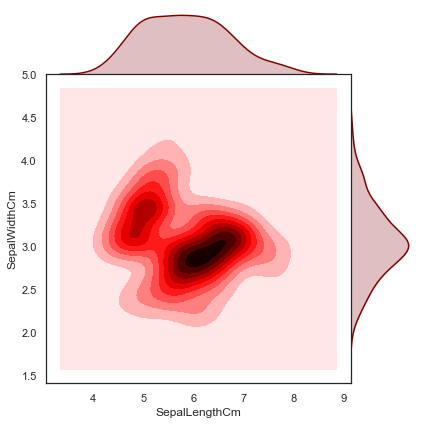

In [22]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=6, kind='kde', color='#800000', space=0)

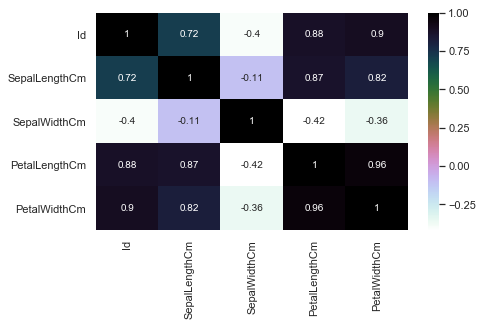

In [23]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

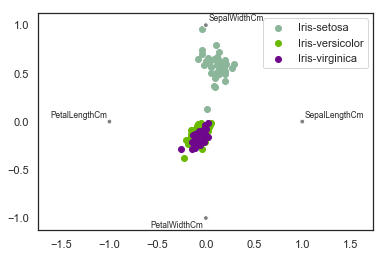

In [24]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(dataset.drop("Id", axis=1), "Species")

In [25]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Sepal length',
                            showgrid=False),
                   yaxis=dict(title='Sepal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [26]:
# shape
print(dataset.shape)

(150, 6)


In [27]:
#columns*rows
dataset.size

900

In [28]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
# remove rows that have NA's
dataset = dataset.dropna()

In [32]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
None


In [33]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [35]:
dataset.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
dataset.tail(10) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
dataset.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
126,127,6.2,2.8,4.8,1.8,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [38]:
dataset.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
dataset.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [40]:
dataset.columns

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')

In [41]:
dataset.where(dataset ['Species']=='Iris-setosa')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
5,6.0,5.4,3.9,1.7,0.4,Iris-setosa
6,7.0,4.6,3.4,1.4,0.3,Iris-setosa
7,8.0,5.0,3.4,1.5,0.2,Iris-setosa
8,9.0,4.4,2.9,1.4,0.2,Iris-setosa
9,10.0,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
dataset[dataset['SepalLengthCm']>7.2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
